<a href="https://colab.research.google.com/github/bajajdivya/project2_cars/blob/main/cars_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/cars_engage_2022.csv')

In [3]:
inputs = df.loc[df.Boot_Space.notna(),['Showroom_Price','Displacement','Cylinders','Valves_Per_Cylinder','Drivetrain','Cylinder_Configuration','Emission_Norm','Fuel_Tank_Capacity','Fuel_Type','City_Mileage','Kerb_Weight','Gears']]

In [4]:
inputs

,Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,City_Mileage,Kerb_Weight,Gears
0,292667,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,23.6,660 kg,4
1,236447,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,23.6,725 kg,4
2,296661,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,15 litres,CNG,23.6,710 kg,4
3,334768,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,23.6,725 kg,5
4,272223,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,23.6,725 kg,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1302000,1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,40 litres,Diesel,22.6,1170 kg,6
1272,1421000,1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,40 litres,Diesel,22.6,1175 kg,6
1273,1431000,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,40 litres,Petrol,18,1107 kg,5
1274,1201000,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,40 litres,Petrol,14.3,1080 kg,5


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
scaler.fit(inputs[['Showroom_Price']])
inputs['Showroom_Price']=scaler.transform(inputs[['Showroom_Price']])

In [8]:
inputs.drop([304], axis=0, inplace=True)
scaler.fit(inputs[['City_Mileage']])
inputs['City_Mileage']=scaler.transform(inputs[['City_Mileage']])

In [9]:
inputs.dtypes

Showroom_Price            float64
Displacement               object
Cylinders                 float64
Valves_Per_Cylinder       float64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Fuel_Tank_Capacity         object
Fuel_Type                  object
City_Mileage              float64
Kerb_Weight                object
Gears                      object
dtype: object

In [10]:
inputs[['Showroom_Price', 'City_Mileage']] = inputs[['Showroom_Price', 'City_Mileage']].apply(pd.to_numeric)


In [11]:
from sklearn.cluster import KMeans

inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
inputs.dropna(inplace=True)
inputs

,Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,City_Mileage,Kerb_Weight,Gears
0,0.000593,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,0.200000,660 kg,4
1,0.000000,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,0.200000,725 kg,4
2,0.000635,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,15 litres,CNG,0.200000,710 kg,4
3,0.001038,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,0.200000,725 kg,5
4,0.000378,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,24 litres,Petrol,0.200000,725 kg,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0.011244,1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,40 litres,Diesel,0.190741,1170 kg,6
1272,0.012500,1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,40 litres,Diesel,0.190741,1175 kg,6
1273,0.012606,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,40 litres,Petrol,0.148148,1107 kg,5
1274,0.010179,1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,40 litres,Petrol,0.113889,1080 kg,5


In [12]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(inputs[['Showroom_Price', 'City_Mileage']])
inputs['cluster'] = y_predicted


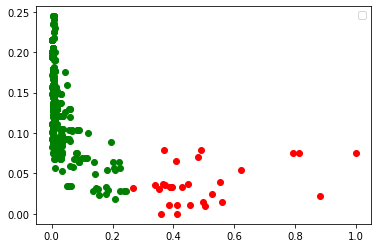

In [13]:
df1 = inputs[inputs.cluster==0]
df2 = inputs[inputs.cluster==1]
plt.scatter(df1.Showroom_Price,df1.City_Mileage,color ='green')
plt.scatter(df2.Showroom_Price,df2.City_Mileage,color ='red')

plt.legend()

In [14]:
k_rng = range(1,20)
sse=[]
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(inputs[['Showroom_Price', 'City_Mileage']])
  sse.append(km.inertia_)

In [15]:
sse

[9.011412269631148,
 2.7381211224880513,
 1.8884936654008144,
 1.1785424828180202,
 0.6203701192524353,
 0.47114091785088247,
 0.3716927169203739,
 0.28058361578186397,
 0.23085092007058583,
 0.20865416290551453,
 0.1887338565092727,
 0.17264021461615425,
 0.15456038098881966,
 0.13584686702656049,
 0.12201200232312114,
 0.1147211635880257,
 0.1032843266179414,
 0.09287753177320379,
 0.08535101333010237]

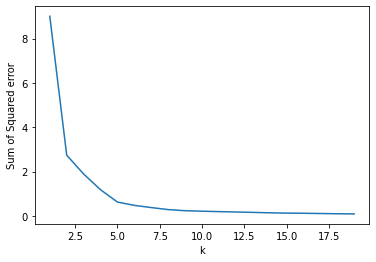

In [16]:
plt.xlabel('k')
plt.ylabel('Sum of Squared error')
plt.plot(k_rng,sse)

In [17]:

# ! pip install pydataset

In [18]:
from pydataset import data
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
%matplotlib notebook

In [20]:

input = inputs

inputs = inputs[['Showroom_Price','City_Mileage']]



In [21]:
inputs

,Showroom_Price,City_Mileage
0,0.000593,0.200000
1,0.000000,0.200000
2,0.000635,0.200000
3,0.001038,0.200000
4,0.000378,0.200000
...,...,...
1271,0.011244,0.190741
1272,0.012500,0.190741
1273,0.012606,0.148148
1274,0.010179,0.113889


In [22]:
max_thresold = inputs['Showroom_Price'].quantile(0.96)
max_thresold

0.390975730088972

In [23]:
inputs[inputs['Showroom_Price']>max_thresold]

,Showroom_Price,City_Mileage
345,0.482307,0.070370
348,0.446322,0.037037
349,0.490413,0.078704
351,0.525407,0.025000
352,0.552268,0.038889
354,0.813353,0.075926
866,0.394431,0.033333
868,0.427448,0.033333
869,0.391116,0.033333
873,0.412428,0.011111


In [24]:
min_thresold = inputs['Showroom_Price'].quantile(0.04)
min_thresold

0.0018073948746940717

In [25]:
inputs[inputs['Showroom_Price']<min_thresold]

,Showroom_Price,City_Mileage
0,0.000593,0.200000
1,0.000000,0.200000
2,0.000635,0.200000
3,0.001038,0.200000
4,0.000378,0.200000
5,0.000827,0.200000
12,0.001233,0.214537
13,0.000494,0.214537
14,0.001550,0.214537
24,0.001221,0.092593


In [26]:
inputs[(inputs['Showroom_Price']<max_thresold) & (inputs['Showroom_Price']>min_thresold)]

,Showroom_Price,City_Mileage
15,0.001866,0.214537
16,0.002077,0.214537
17,0.002301,0.214537
20,0.002158,0.214537
21,0.002475,0.214537
...,...,...
1271,0.011244,0.190741
1272,0.012500,0.190741
1273,0.012606,0.148148
1274,0.010179,0.113889


In [27]:
from sklearn import svm,datasets
from sklearn.preprocessing import LabelEncoder

In [28]:
le_emission_norm = LabelEncoder()
le_Fuel_Tank_Capacity =LabelEncoder()
le_Fuel_Type = LabelEncoder()

grid = df[['Showroom_Price','City_Mileage','Cylinders']]
grid['Emission_Norm']= le_emission_norm.fit_transform(df['Emission_Norm'])
grid['Fuel_Tank_Capacity'] =le_Fuel_Tank_Capacity.fit_transform(df['Fuel_Tank_Capacity'])
grid['Fuel_Type']= le_Fuel_Type.fit_transform(df['Fuel_Type'])
grid['Showroom_Price'] = grid['Showroom_Price'].div(100000).round(0)

grid.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
grid.dropna(inplace=True)
grid.drop([304], axis=0, inplace=True)


target = grid['Showroom_Price']

kk = grid

grid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Showroom_Price,City_Mileage,Cylinders,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type
0,3.0,23.6,2.0,2,3,5
1,2.0,23.6,2.0,2,3,5
2,3.0,23.6,2.0,2,2,0
3,3.0,23.6,2.0,2,3,5
4,3.0,23.6,2.0,2,3,5
...,...,...,...,...,...,...
1271,13.0,22.6,4.0,2,10,2
1272,14.0,22.6,4.0,2,10,2
1273,14.0,18,4.0,0,10,5
1274,12.0,14.3,4.0,0,10,5


In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(grid, target,test_size = 0.3)

In [30]:
model = svm.SVC(kernel='poly',C=30,gamma='auto')



In [31]:
model.fit(X_train,y_train)


SVC(C=30, gamma='auto', kernel='poly')

In [32]:
model.score(X_test,y_test)

0.7075471698113207

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
kernels = ['rbf', 'linear']
C= [1,10,20,30]
avg_score ={}
for kval in kernels:
  for cval in C:
    cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),grid,target,cv=5)
    avg_score[kval +'_'+ str(cval)] = np.average(cv_scores)

avg_score

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

{'rbf_1': 0.32092198581560283,
 'rbf_10': 0.45876393110435665,
 'rbf_20': 0.45876393110435665,
 'rbf_30': 0.45876393110435665,
 'linear_1': 0.7940526849037488,
 'linear_10': 0.7954711246200608,
 'linear_20': 0.7954711246200608,
 'linear_30': 0.7954711246200608}

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [36]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
grid['target'] =grid['Showroom_Price']

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(grid, grid.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklea

,model,best_score,best_params
0,svm,0.803982,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.714448,{'n_estimators': 10}
2,logistic_regression,0.180426,{'C': 5}
3,naive_bayes_gaussian,0.825279,{}
4,naive_bayes_multinomial,0.197366,{}
5,decision_tree,0.848045,{'criterion': 'gini'}


In [37]:
kk

,Showroom_Price,City_Mileage,Cylinders,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,target
0,3.0,23.6,2.0,2,3,5,3.0
1,2.0,23.6,2.0,2,3,5,2.0
2,3.0,23.6,2.0,2,2,0,3.0
3,3.0,23.6,2.0,2,3,5,3.0
4,3.0,23.6,2.0,2,3,5,3.0
...,...,...,...,...,...,...,...
1271,13.0,22.6,4.0,2,10,2,13.0
1272,14.0,22.6,4.0,2,10,2,14.0
1273,14.0,18,4.0,0,10,5,14.0
1274,12.0,14.3,4.0,0,10,5,12.0


In [38]:
trg = kk['Showroom_Price']
trg

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
1271    13.0
1272    14.0
1273    14.0
1274    12.0
1275    69.0
Name: Showroom_Price, Length: 704, dtype: float64

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

kk0 = kk[:500]
kk1 = kk[500:]

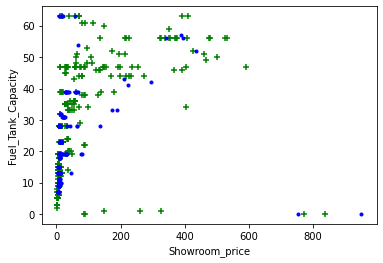

In [40]:
plt.xlabel('Showroom_price')
plt.ylabel('Fuel_Tank_Capacity')
plt.scatter(kk0['Showroom_Price'], kk0['Fuel_Tank_Capacity'],color="green",marker='+')
plt.scatter(kk1['Showroom_Price'], kk1['Fuel_Tank_Capacity'],color="blue",marker='.')

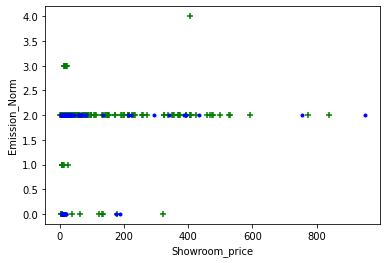

In [41]:
plt.xlabel('Showroom_price')
plt.ylabel('Emission_Norm')
plt.scatter(kk0['Showroom_Price'], kk0['Emission_Norm'],color="green",marker='+')
plt.scatter(kk1['Showroom_Price'], kk1['Emission_Norm'],color="blue",marker='.')

In [42]:
from sklearn.model_selection import train_test_split
X = kk.drop(['target','Showroom_Price'],axis='columns')
y= kk.target

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
len(X_train)

563

In [45]:
len(X_test)

141

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
knn.score(X_test,y_test)

0.19148936170212766

In [49]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(879.0, 0.5, 'Truth')

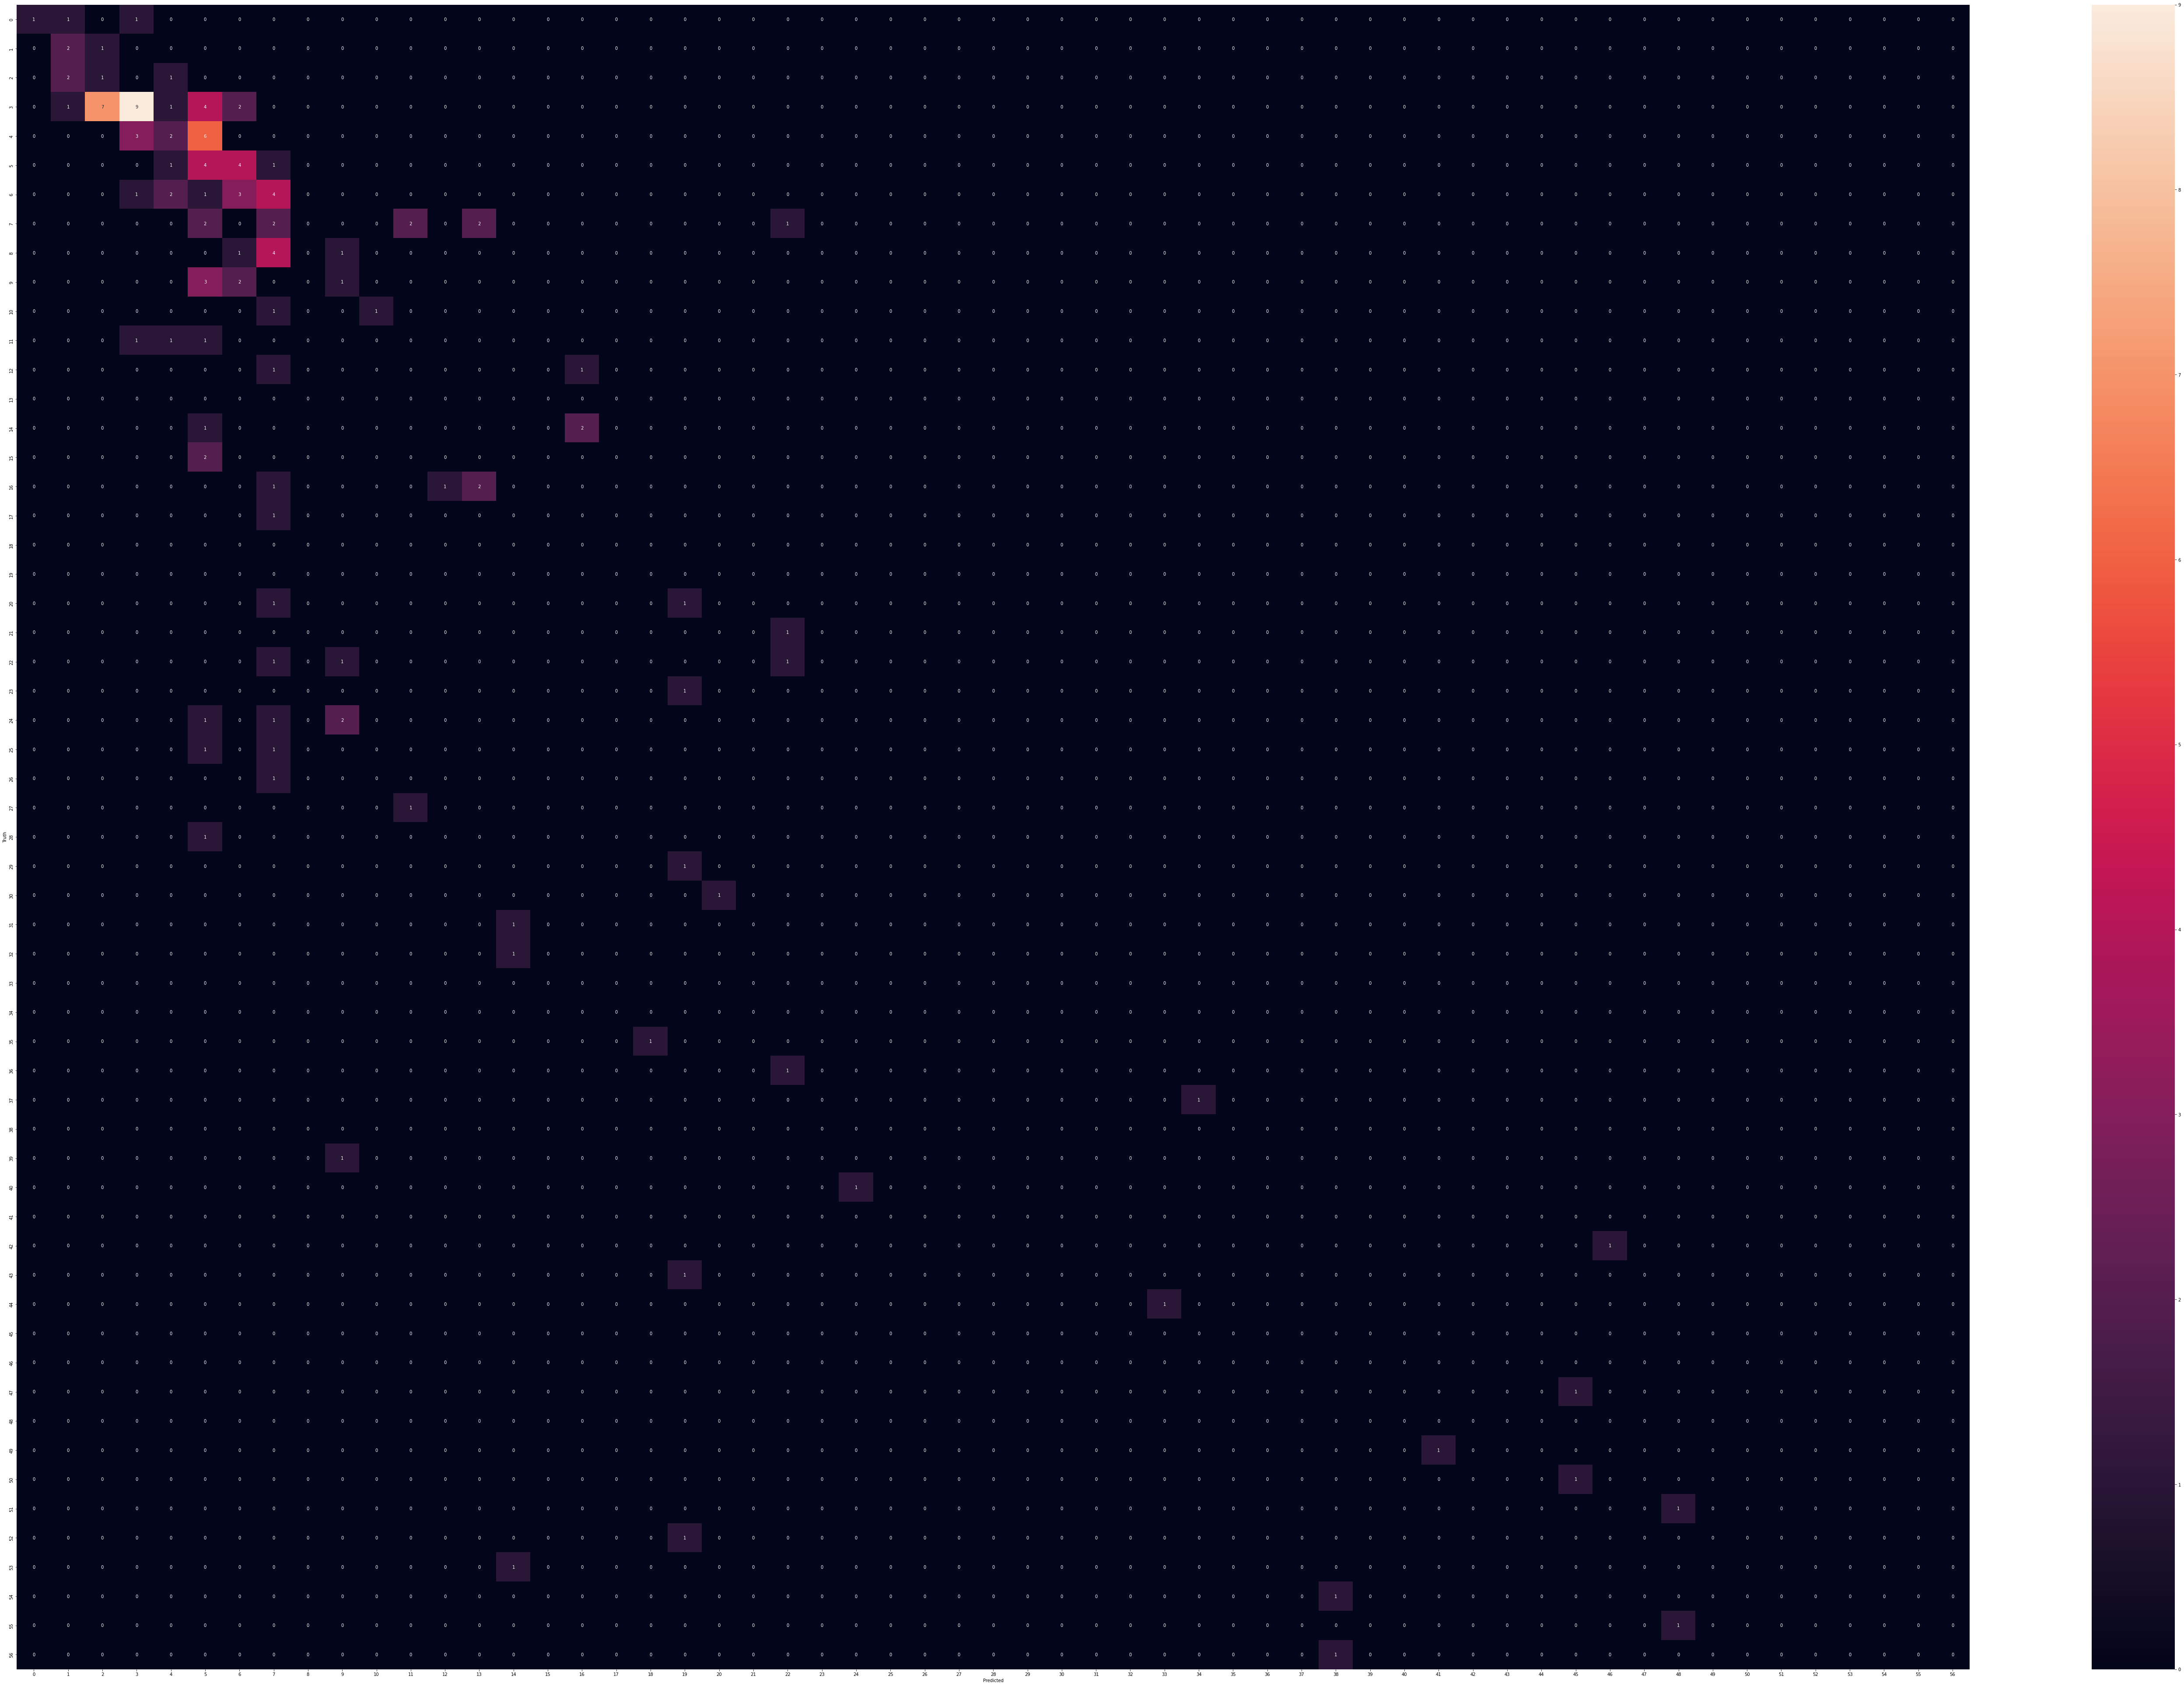

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(100,70))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         3.0       1.00      0.33      0.50         3
         4.0       0.33      0.67      0.44         3
         5.0       0.11      0.25      0.15         4
         6.0       0.60      0.38      0.46        24
         7.0       0.25      0.18      0.21        11
         8.0       0.15      0.40      0.22        10
         9.0       0.25      0.27      0.26        11
        10.0       0.10      0.22      0.14         9
        11.0       0.00      0.00      0.00         6
        12.0       0.17      0.17      0.17         6
        13.0       1.00      0.50      0.67         2
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         2
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         3
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         4
        21.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

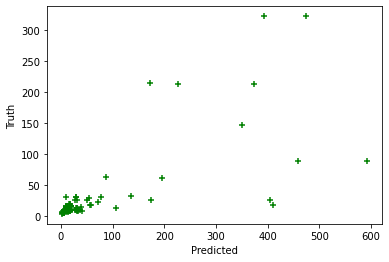

In [52]:
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.scatter(y_test,y_pred,color="green",marker='+')